In [12]:
import sys
sys.path.append('../src')
import causaltensor as ct
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from causaltensor.sample_data import fetch

In [14]:
O_raw = fetch()

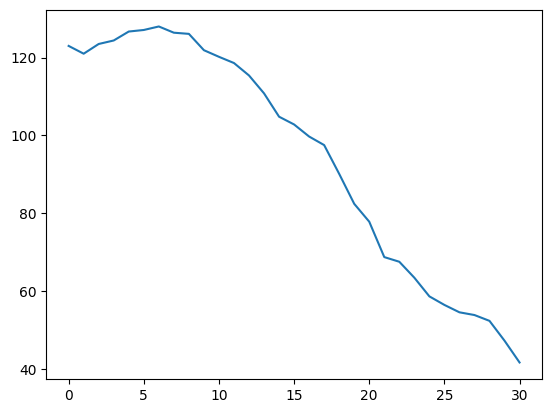

In [15]:
O = O_raw[8:, :]
O = O.T
plt.plot(O[-1, :])

In [16]:
Z = np.zeros_like(O)
Z[-1, 19:] = 1 #start to apply the treatment in 1989

In [17]:
s = np.linalg.svd(O, full_matrices=False, compute_uv=False)

## DID estimation

In [18]:
from causaltensor import DIDPanelSolver 

solver = DIDPanelSolver(Z = Z)
res = solver.fit(O)

In [20]:
res.tau

-27.349111083614964

## SDID estimation

In [21]:
from causaltensor.cauest import SDID

tau = SDID(O, Z)

In [22]:
tau

-15.602326126984675

## Matrix Completion

In [23]:
from causaltensor import MCNNMPanelSolver

solver = MCNNMPanelSolver(Z = Z)
res = solver.solve_with_suggested_rank(O=O, suggest_r=1)

In [24]:
solver = MCNNMPanelSolver(Z = Z)
res = solver.solve_with_cross_validation(O=O)
res.tau

-20.267535327741033

## Debiased Convex Panel Regression

In [25]:
import causaltensor.cauest.DebiasConvex as DebiasConvex
import causaltensor.matlib.util as util

from importlib import reload
reload(DebiasConvex)
reload(util)
M, tau, std = DebiasConvex.DC_PR_with_suggested_rank(O, Z, suggest_r = 2)
#M, tau, variance = 
#M, tau, M_raw, tau_raw = DC_PR_auto_rank(O, Z)
#variance = std_debiased_convex(O, Z, M_raw, tau_raw)
#print(tau, variance)

In [26]:
M, tau, std = DebiasConvex.DC_PR_auto_rank(O, Z, method = 'non-convex')
print(tau, std)

-15.880704119035332 3.011813924289437


In [27]:
M, tau, std = DebiasConvex.DC_PR_auto_rank(O, Z, method = 'auto')
print(tau, std)

-15.880704119035332 3.011813924289437
